# Drone and worker bee detection with RT-DETR

## Verify GPU
 In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Nov  8 17:21:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from ultralytics import RTDETR
from IPython.display import display, Image

## Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="iyvYj1Ir4z6uyTkA0l7n")
project = rf.workspace("plan-lzmi4").project("my-first-project-qsn5k")
version = project.version(6)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-6 in yolov8:: 100%|██████████| 152/152 [00:00<00:00, 5742.10it/s]


## Training

Modify data.yaml with the correct path:

test: /content/datasets/test/images

train: /content/datasets/Bee-Detection-1/train/images

val: /content/datasets/Bee-Detection-1/valid/images


In [ ]:
MODEL = 'rtdetr-l.pt'
IMG_SIZE = 640
EPOCHS = 50
HALF=True

In [ ]:
%cd {HOME}

!yolo task=detect mode=train batch={8} model={MODEL} data={dataset.location}/data.yaml epochs={EPOCHS} imgsz={IMG_SIZE} plots=True patience=7

/content
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/My-First-Project-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=7, perspectiv

In [ ]:
WEIGHTS_PATH = f"{HOME}/runs/detect/train/weights/best.pt"


In [ ]:
validation_command = (
    f"yolo task=detect mode=val "
    f"model={WEIGHTS_PATH} "
    f"data={dataset.location}/data.yaml "
    f"imgsz={IMG_SIZE}"
)

print(f"Executing validation command: {validation_command}")
!{validation_command}

Executing validation command: yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/My-First-Project-6/data.yaml imgsz=640
Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,987,850 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2486.9±596.7 MB/s, size: 96.7 KB)
val: Scanning /content/datasets/My-First-Project-6/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5/5 84.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.7it/s 0.4s
                   all          5        206      0.906      0.967      0.971      0.738
             Drone Bee          5          9      0.873          1      0.995      0.767
            Worker Bee          5        197      0.939      0.934      0.947      0.709
Speed: 1.9ms preprocess, 51.0ms inference, 0.0ms

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml			 confusion_matrix.png  train_batch2.jpg
BoxF1_curve.png			 labels.jpg	       val_batch0_labels.jpg
BoxP_curve.png			 results.csv	       val_batch0_pred.jpg
BoxPR_curve.png			 results.png	       weights
BoxR_curve.png			 train_batch0.jpg
confusion_matrix_normalized.png  train_batch1.jpg


/content


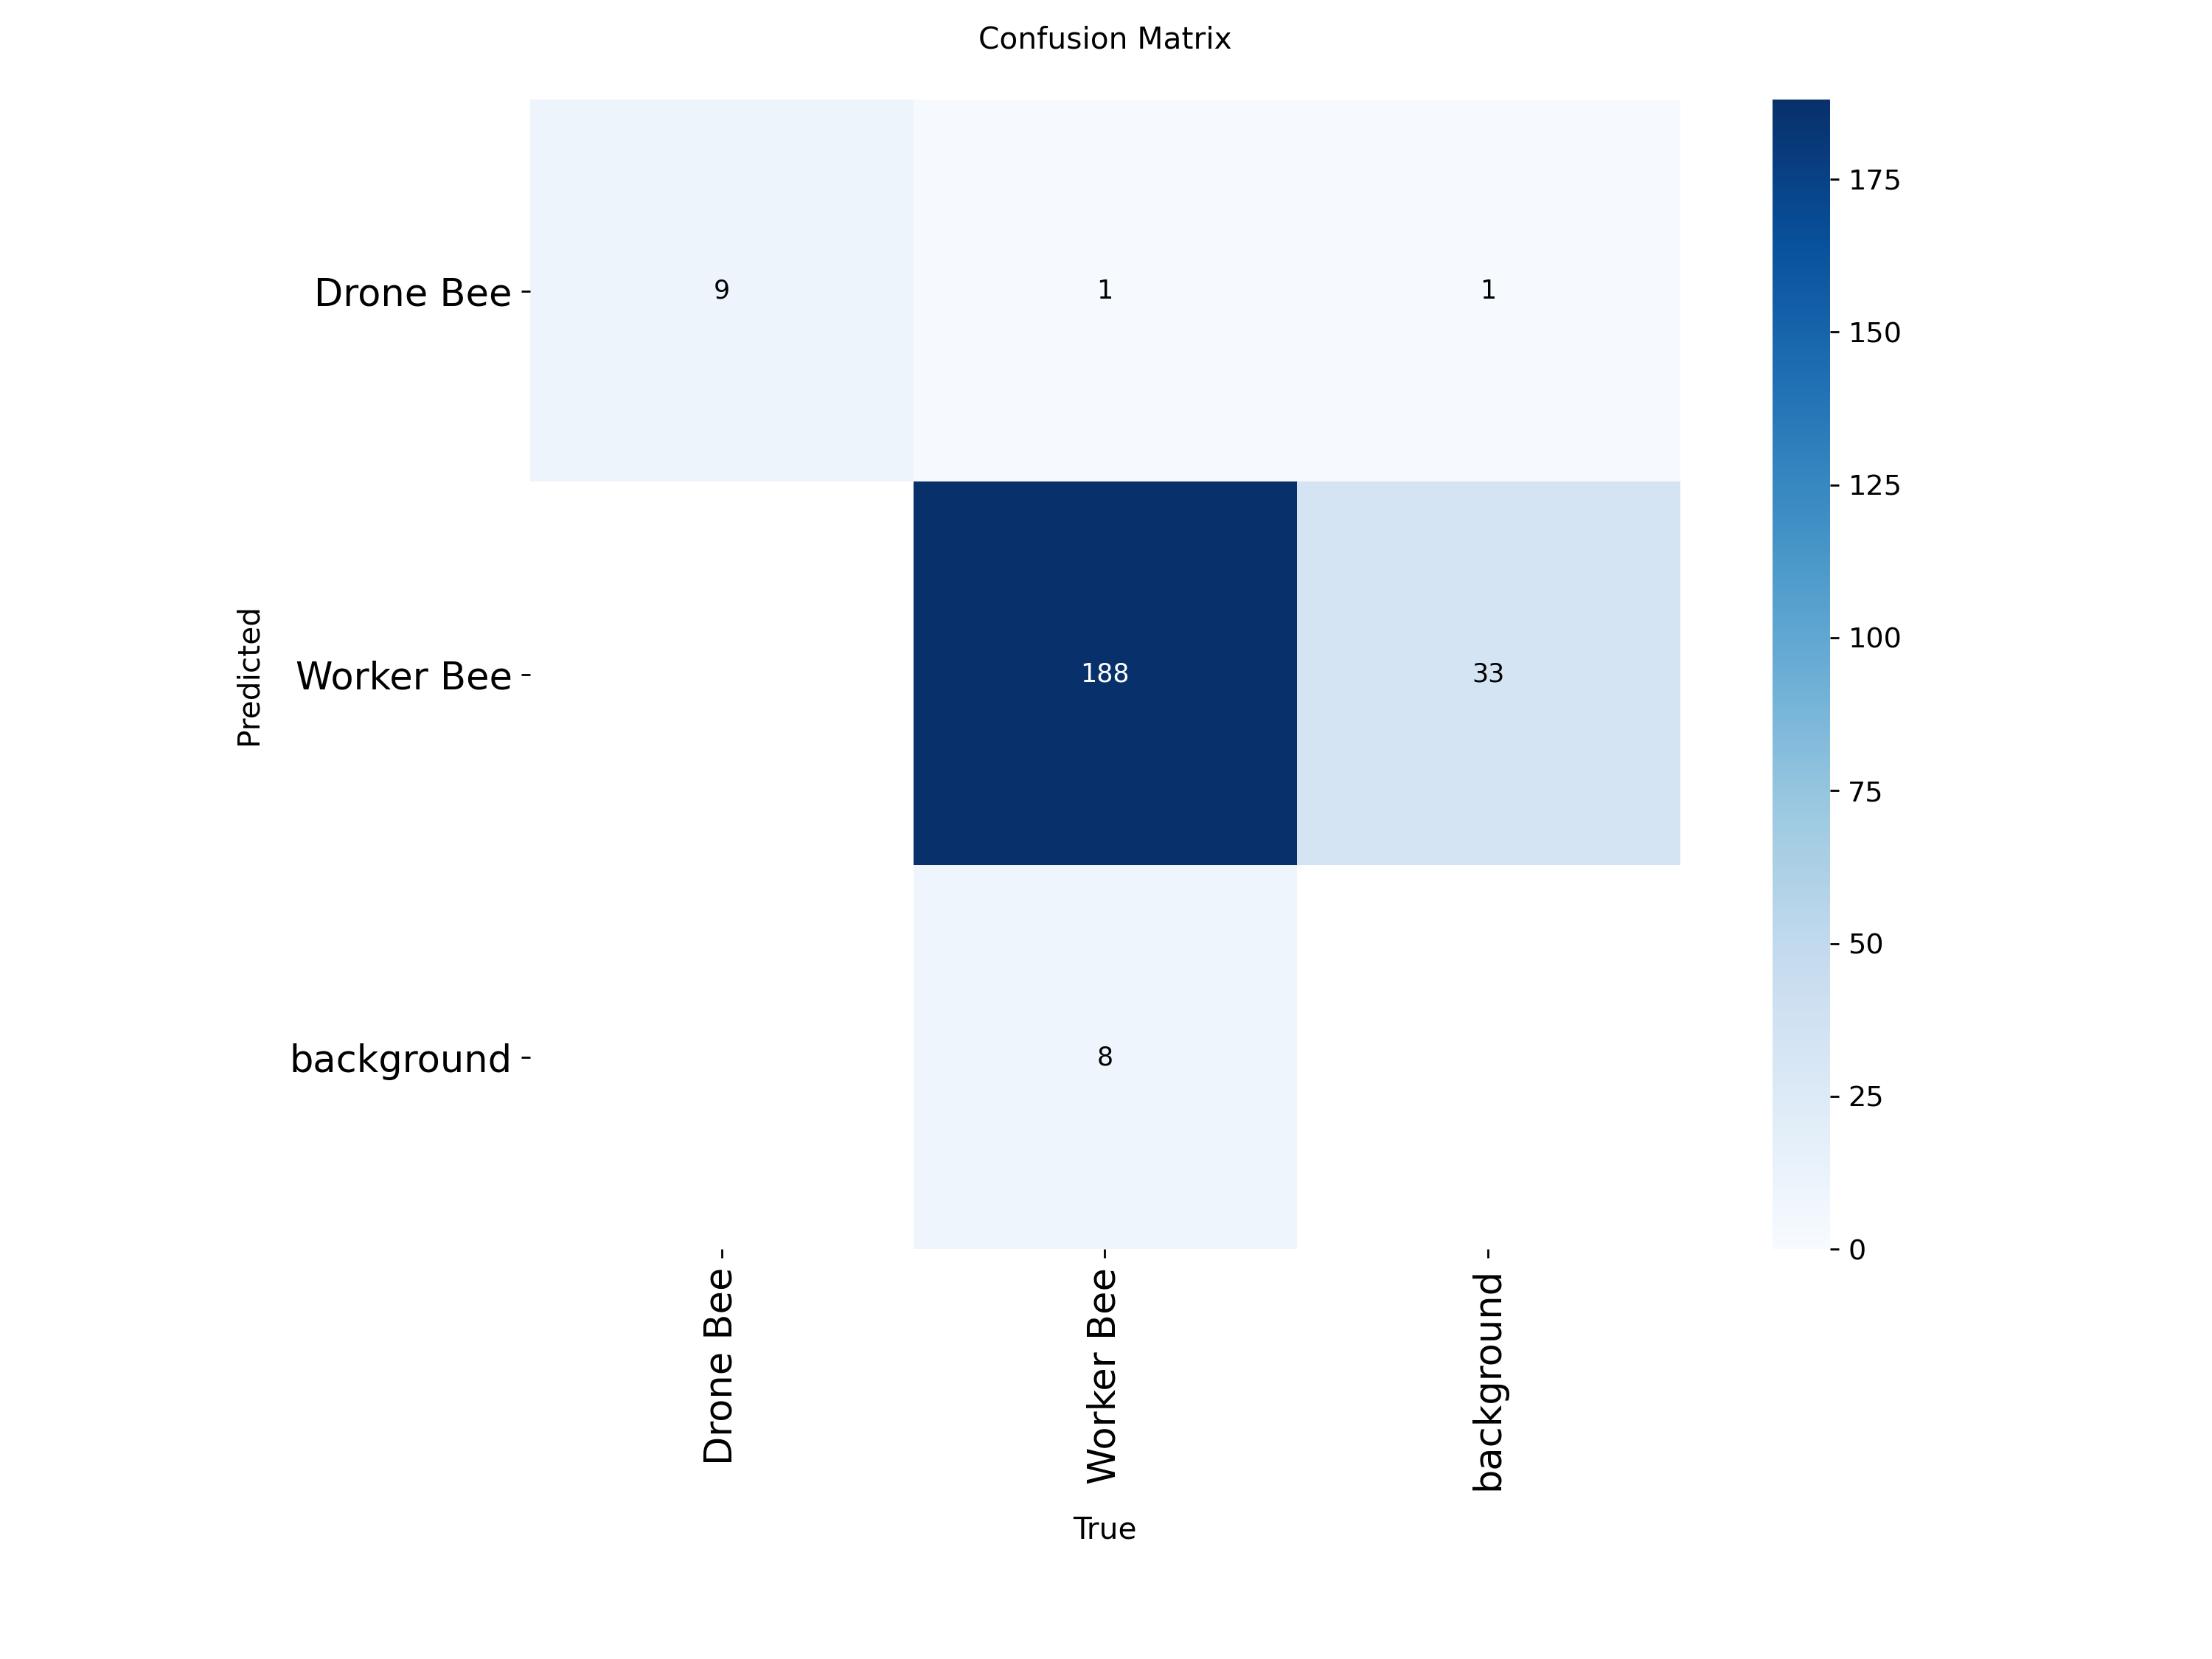

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

/content


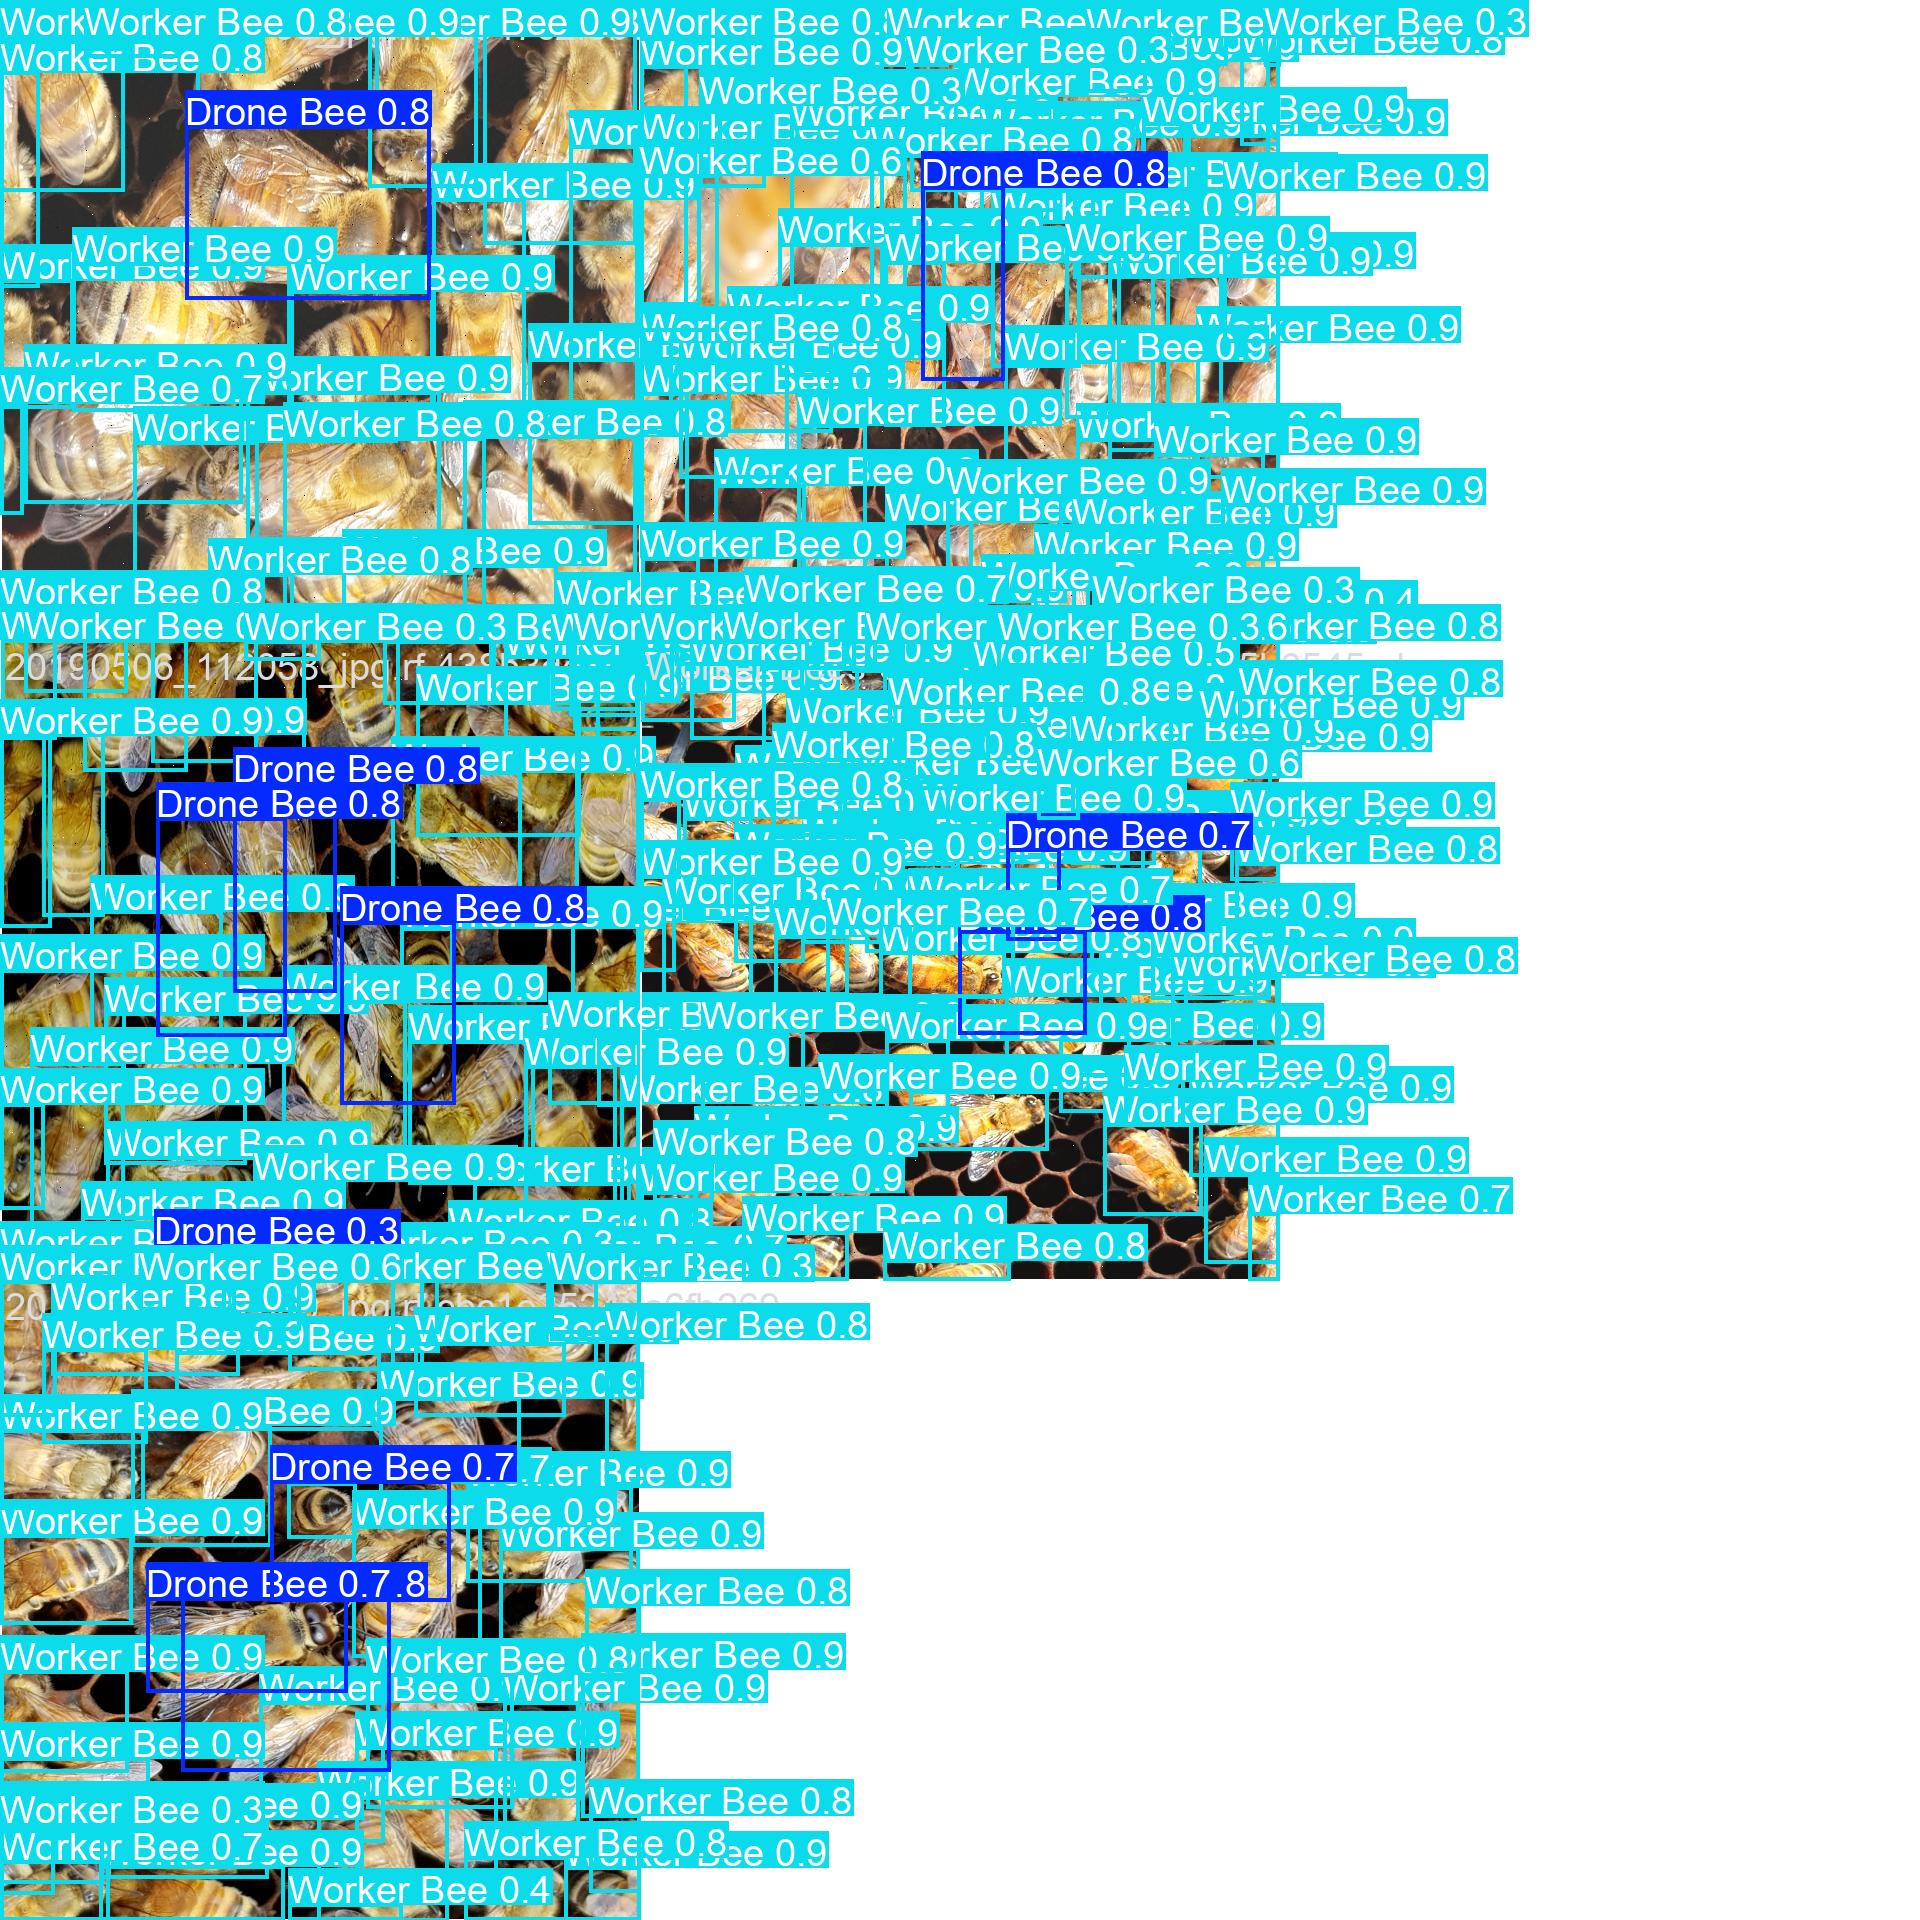

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)